In [2]:
import torch
import torchvision
from torchvision import models

import cv2
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import sys
sys.path.append('yolov5')

from yolov5 import utils
import keras_ocr

import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

display = utils.notebook_init()

YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.6 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3902MiB)


Setup complete ✅ (16 CPUs, 15.0 GB RAM, 204.5/219.4 GB disk)


In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Device: {device}")

Device: cuda


2023-12-30 09:30:12.506050: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-30 09:30:12.510203: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-30 09:30:12.510328: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Looking for /home/sanyam/.keras-ocr/craft_mlt_25k.h5


L355
2023-12-30 09:30:12.511225: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-30 09:30:12.511313: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-30 09:30:12.575484: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#

Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.
Looking for /home/sanyam/.keras-ocr/crnn_kurapan.h5


2023-12-30 09:30:15.158961: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2023-12-30 09:30:15.659663: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.26GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-30 09:30:16.015650: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.26GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-30 09:30:16.540995: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 848.95MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could 

2/2 [==============================] - 3s 285ms/step


<Axes: >

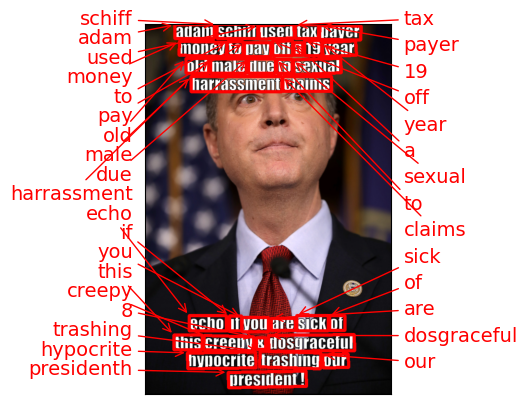

In [4]:
img_path = "Data/img/12647.png"

pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read(img_path)
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [5]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

pipeline = keras_ocr.pipeline.Pipeline()

def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    for box in prediction_groups[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

Looking for /home/sanyam/.keras-ocr/craft_mlt_25k.h5
Looking for /home/sanyam/.keras-ocr/crnn_kurapan.h5


In [12]:
img = inpaint_text(img_path, pipeline)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite("12647_inpaint.png", img)
plt.imshow(img)

2/2 [==============================] - 0s 9ms/step


In [10]:
path2 = 'Data/'
objects = {}
done = 0

accumulated_data = pd.DataFrame(columns=['img', 'xmin', 'ymin', 'xmax', 'ymax', 'confidence', 'class', 'name'])
global_csv_path = path2 + 'yolov5_global_results.csv'

accumulated_data.to_csv(global_csv_path, mode='w', index=False)

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.to(device)
model.eval()

with torch.no_grad():
    results = model(img_path)
    object1 = results.pandas().xyxy[0]
    object1['img'] = img_path

    xmin, ymin, xmax, ymax = object1['xmin'], object1['ymin'], object1['xmax'], object1['ymax']
    label = object1['name']
    for i in range(len(xmin)):
        print(xmin[i], ymin[i], xmax[i], ymax[i], label[i])
        # Draw the bounding box
        start_point = (int(xmin[i]), int(ymin[i]))
        end_point = (int(xmax[i]), int(ymax[i]))
        color = (255, 0, 0)  # Blue color in BGR
        thickness = 1
        img = cv2.rectangle(img, start_point, end_point, color, thickness)

        # Put the label
        cv2.putText(img, label[i], (int(xmin[i]), int(ymin[i])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    plt.imshow(img)
    plt.show()

Using cache found in /home/sanyam/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.6 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3902MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


2.524818181991577 144.90902709960938 532.8106079101562 800.0 person
223.01231384277344 482.16217041015625 320.62432861328125 792.6669311523438 tie
